In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
%matplotlib inline

In [27]:
data = pd.read_csv('./titanic/train.csv')

In [60]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [66]:
data[data['Sex'] == 'male'] = 1
data[data['Sex'] == 'female'] = 0
data

/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2932b890>,
      dtype=object)

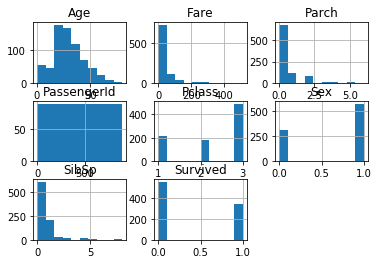

In [67]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c297a5210>,
      dtype=object)

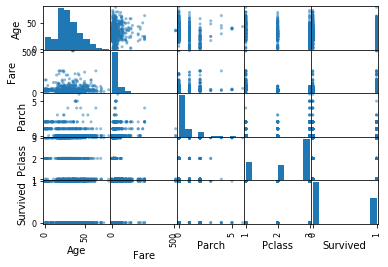

In [68]:
from pandas.plotting import scatter_matrix
scatter_matrix(test[['Sex','Age','Fare','Parch','Pclass','Survived']])

In [69]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


Conclusion: Pclass and Fare have relatviely higher correlation with the Survived.

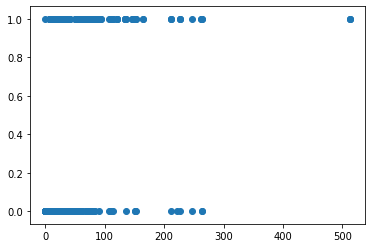

In [77]:
# Visualizing the dataset
plt.scatter(data['Fare'], data['Survived'])
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Fare'], data['Survived'], test_size=0.20)

In [73]:
# Normalisation
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_minmax = mm_scaler.transform(X_test.values.reshape(-1, 1))

/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


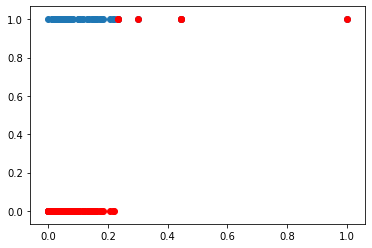

Accuracy = 0.6145251396648045


In [74]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train_minmax, y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test_minmax)

plt.clf()
plt.scatter(X_test_minmax, y_test)
plt.scatter(X_test_minmax, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test_minmax, y_test.values.reshape(-1, 1))}")

/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


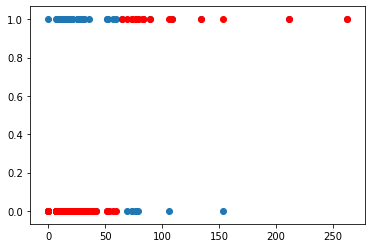

Accuracy = 0.6759776536312849


In [40]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")


Multiple Logistic regression：

In [83]:
list(data.columns.values)  

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [94]:
data2 = data.dropna()
data2.shape

(183, 12)

In [128]:
# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data2[['Sex'] + ['Fare']], data2[['Survived']], test_size=0.20)

In [129]:
X_train

,Sex,Fare
148,1,26.0000
765,0,77.9583
209,1,31.0000
435,0,120.0000
585,0,79.6500
...,...,...
583,1,40.1250
679,1,512.3292
671,1,52.0000
460,1,26.5500


In [139]:
lr_model.fit(X_train[['Sex'] + ['Fare']], y_train[['Survived']])

/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
y_pred_sk=lr_model.predict(X_test)
y_pred_sk.shape

(37,)

In [132]:
# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values, y_test.values)}")

Accuracy = 0.7567567567567568


In [137]:
lr_model.coef_

array([[-2.16474464,  0.0024547 ]])